In [1]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

from sklearn.decomposition import NMF


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('spotify.xls',index_col=[0])

In [3]:
df.head()

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_1,2,2,8,8,13,1,4,9,1,2,...,14,2,14,1,9,0,11,6,14,7
user_2,13,5,5,5,12,8,10,10,2,2,...,10,6,11,1,1,5,12,8,3,0
user_3,3,9,2,8,0,1,11,7,3,7,...,9,5,7,15,12,13,14,5,0,14
user_4,2,6,7,8,14,0,12,7,8,1,...,9,15,9,14,10,6,11,13,6,0
user_5,11,12,8,6,13,7,0,7,3,13,...,12,14,11,11,11,7,3,6,11,7


In [4]:
df.shape

(1000, 5000)

In [5]:
x=df.values

In [6]:
#Non-negative matrix factorization
nmf = NMF(n_components=100, max_iter=1000, random_state=200)

In [7]:
nmf.fit(x)

NMF(max_iter=1000, n_components=100, random_state=200)

In [8]:
user_matrix = nmf.transform(x)

In [9]:
user_matrix

array([[0.03041152, 0.        , 6.03735754, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.10450949, 0.        , ..., 0.        , 1.51397869,
        0.        ],
       [0.        , 3.09227919, 0.        , ..., 0.62299824, 0.        ,
        0.        ],
       ...,
       [0.        , 1.26239448, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.11442141, 3.90306648, 0.5963574 , ..., 0.        , 0.51928477,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.32054707, 0.        ,
        0.        ]])

In [10]:
user_matrix.shape

(1000, 100)

In [11]:
song_matrix = nmf.components_.T

In [12]:
song_matrix

array([[0.29227977, 0.29155378, 0.23095434, ..., 0.02158349, 0.        ,
        0.042259  ],
       [0.2201218 , 0.        , 0.        , ..., 0.        , 0.52120311,
        0.16391248],
       [0.        , 0.16101005, 0.        , ..., 0.22639116, 0.26109955,
        0.14051861],
       ...,
       [0.        , 0.29521502, 0.02888085, ..., 0.31876971, 0.2938576 ,
        0.2803698 ],
       [0.21569302, 0.10762248, 0.04239307, ..., 0.17080385, 0.03336278,
        0.28784931],
       [0.10459146, 0.24942716, 0.12342307, ..., 0.31145263, 0.17757793,
        0.22799469]])

In [13]:
song_matrix.shape

(5000, 100)

In [14]:
#Steps of building a recommendation system (type-1):
#1. Consider recommending songs to user No 1 who is located at Row=0
#2. Find the Euclidean distance between the first user and the remaining 999 users
#3. Find out the top 10 songs heard by 5 nearest users
#4. Recommend those songs to user No 1


In [15]:
def calculate_distance(u1, u2):
    return pow(sum([pow(u1[x]-u2[x],2)for x in range(len(u1))]),0.5)

In [16]:
calculate_distance(user_matrix[0], user_matrix[1])

16.400235201565735

In [17]:
def distanceFromUser(base_user, user_matrix):
    
    distance=[]
    for i in range(len(user_matrix)):
        if (base_user != i):
            distance.append(calculate_distance(user_matrix[base_user], user_matrix[i]))
        else:
            pass
        
    return distance

In [18]:
dist1 = distanceFromUser(2, user_matrix)

In [19]:
dist1

[15.537635020837138,
 13.929966742368592,
 13.45776976367253,
 15.65197394581856,
 13.649397906084488,
 14.612622415101942,
 13.569062965415414,
 12.990063917755064,
 13.941658045651819,
 14.554918248008885,
 12.92908934074374,
 13.649529047317454,
 15.075568275633104,
 14.241969825061574,
 13.856184132458194,
 15.119711846760865,
 12.959308254634994,
 15.664109738883214,
 12.720255663035294,
 12.88129811524911,
 13.152735521016579,
 13.239146076994114,
 14.131594128275491,
 15.547198358449439,
 13.560695899189037,
 15.470660216139084,
 13.756324643361141,
 11.914393302853231,
 13.311688980878134,
 13.363315112664223,
 12.868078569298888,
 12.933379504886055,
 13.286614043607198,
 12.159266943608577,
 15.21538420860561,
 14.094538470365956,
 15.992794261309742,
 13.397568929177371,
 14.47775720318219,
 14.051110454244945,
 13.924521871947475,
 15.760929727845996,
 11.866183600111265,
 13.451469417239858,
 14.467116154498536,
 13.962094706180123,
 11.725431118421517,
 14.394465494654364

In [20]:
closest_users = np.argsort(dist1)[0:5]

In [21]:
closest_users

array([566, 921, 984, 956, 495], dtype=int64)

In [22]:
for i in closest_users:
    print('songs heard by the user ',i)
    temp = pd.DataFrame(df.iloc[i])
    print(temp[temp.values !=0].index)

songs heard by the user  566
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4664)
songs heard by the user  921
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_8',
       'song_9', 'song_10', 'song_11',
       ...
       'song_4990', 'song_4991', 'song_4992', 'song_4993', 'song_4994',
       'song_4995', 'song_4996', 'song_4997', 'song_4998', 'song_4999'],
      dtype='object', length=4698)
songs heard by the user  984
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=

In [23]:
def recomending_top5_songs(closest_users, df):
    temp_df = df.iloc[closest_users]
    dict1 = temp_df.max().to_dict()
    sorted_dict = sorted(dict1.items(),key=lambda keyvalue:(keyvalue[1], keyvalue[0]), reverse=True)[0:5]
    
    return [x[0] for x in sorted_dict]

In [24]:
recomending_top5_songs(closest_users, df)

['song_998', 'song_994', 'song_993', 'song_988', 'song_987']

# Building recommendation method type-2

In [56]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

In [26]:
wcss={}

for k in range(1,50):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(song_matrix)
    wcss[k] = kmeans.inertia_

In [27]:
wcss

{1: 14055.597631065442,
 2: 13892.03205423631,
 3: 13770.346569542557,
 4: 13678.395488238417,
 5: 13599.64898745093,
 6: 13533.515982794257,
 7: 13471.59252500812,
 8: 13423.728663474745,
 9: 13367.930241012866,
 10: 13336.215105681453,
 11: 13298.604255816159,
 12: 13262.154638236976,
 13: 13224.413874668382,
 14: 13206.706847308498,
 15: 13173.036542693653,
 16: 13152.4196068068,
 17: 13132.436190886554,
 18: 13113.070298502567,
 19: 13092.901266302315,
 20: 13079.326642290418,
 21: 13044.226168695603,
 22: 13038.406541032864,
 23: 13022.979230339099,
 24: 13000.79284586248,
 25: 12986.341480346506,
 26: 12976.9498141063,
 27: 12953.998005808757,
 28: 12945.310823240437,
 29: 12921.466887687204,
 30: 12910.6652748152,
 31: 12888.574517382373,
 32: 12871.148451818564,
 33: 12871.87650032126,
 34: 12856.745419714294,
 35: 12843.640655869276,
 36: 12836.302613110644,
 37: 12821.912772279511,
 38: 12807.78764165473,
 39: 12792.082927092859,
 40: 12779.050625018506,
 41: 12765.7860596990

Text(0, 0.5, 'error')

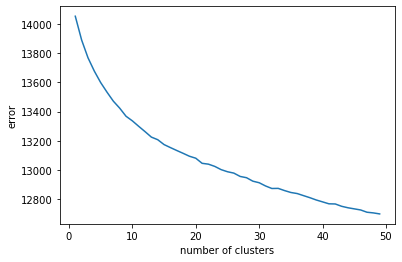

In [31]:
#plt.figure()
plt.plot(list(wcss.keys()),list(wcss.values()))
plt.xlabel('number of clusters')
plt.ylabel('error')

In [29]:
#looking at the above curve taking k value as 12

In [67]:
def recommend_songs(df, n_clusters, song_matrix, song_name, n_recommendations):
    
    #fitting kmeans clustering algorithm
    kmeans = KMeans(n_clusters=n_clusters, max_iter=1000).fit(song_matrix)
    
    #Getting the index of the song heard by the user
    index_of_song = df.columns.to_list().index(song_name)
    
    
    #Getting the listening values of the base song from the decomposed song matrix
    song_vector = song_matrix[index_of_song]
    
    #Getting songs in the song_matrix similar to the base song
    #Creating different clusters of songs from song matric using kmeans
    all_songs_in_cluster = list(kmeans.predict(song_matrix))
    
    
    #Collecting songs which belong to same cluster
    song_in_selected_cluster = [x for x in range(len(all_songs_in_cluster)) if all_songs_in_cluster[x] == [kmeans.predict([song_vector])]]
    
    
    #Gets values of the selected song from the song matrix
    song_cluster = song_matrix[song_in_selected_cluster]
    
    #fitting nearest neighbours to get  number of recommended songs
    nn = NearestNeighbors(n_neighbors=n_recommendations)
    
    #Identifying the nearest song using  the nearest  neighbours algorithm
    nn.fit(song_cluster)
    
    #finding of the nearest neighbors to the base song
    recommended_songs = nn.kneighbors([song_matrix[index_of_song]])
    #print(recommended_songs[1][0])
    
    #Getting all song names in a list
    col_list = list(df.columns)
    #print(col_list)
    
    
    return [col_list[x] for x in recommended_songs[1][0]]
    

In [69]:
recommend_songs(df, 12, song_matrix, 'song_2', 10)

['song_1',
 'song_14',
 'song_121',
 'song_141',
 'song_165',
 'song_312',
 'song_362',
 'song_349',
 'song_79',
 'song_103']